Training set R2: 0.886052
Test set R2: 0.721381
training set score: 0.793504
test set score: 0.588659
training set score: 0.926525
test set score: 0.745732
4
6
8
0
1
2
3
4
3
4
5


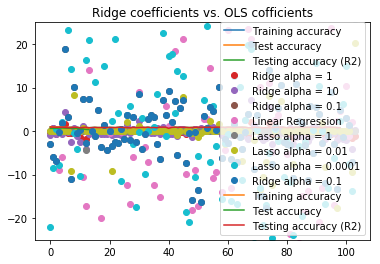

0.84407662332631284

In [3]:
#============================================
#  Hồi quy tuyến tính OLS, Ridge và Lasso
#============================================

#-----------------------
#    Hồi quy OLS
#-----------------------

import matplotlib as plt
import matplotlib.pyplot as plt

# Load gói và bộ dữ liệu Boston: 
import mglearn
X, y = mglearn.datasets.load_extended_boston()

# Thực hiện phân chia dữ liệu: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 2 / 10,
                                                    random_state = 0)

# Load hàm hồi quy tuyến  tính OLS: 
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

# Thực hiện hồi quy tuyến  tính: 
lr = LinearRegression().fit(X_train, y_train) 

# R2 cho dữ  liệu train  và test: 
lr.score(X_train, y_train)
lr.score(X_test, y_test)

#----------------------
#   Hồi quy Ridge
#----------------------

from sklearn.linear_model import Ridge

# Thực hiện hồi quy quy Ridge với alpha = 1 mặc định: 
ridge = Ridge().fit(X_train, y_train)
print("Training set R2: %f" % ridge.score(X_train, y_train))
print("Test set R2: %f" % ridge.score(X_test, y_test))


#  Khi alpha = 10: 
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

#  Khi alpha = 0.1: 
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))


#-------------------------------------------------------------------------
# Khảo sát biến đổi của R2 cho train và  test data với một dải của alpha
#-------------------------------------------------------------------------

# Trước hết khảo sát sự vận hành của lệnh range(): 

a = range(1, 10)
a

# Dùng Python 3 nên chuyển a về list: 
list(a)

# Hoặc sử dụng hàm arange của gói numpy: 
import numpy
numpy.arange(11, 13, 0.5)

b = numpy.arange(10**-4, 10**2)    
len(b)   
b 

[100*x for x in range(1, 10)]

for i in range(4, 10, 2):
    print(i)
    
for i in range(5): 
    print(i)
    
    
for i in range(3, 6): 
    print(i)
    

# Thiết lập một dải của  alpha cần khảo sát: 
    
alpha_list = [0.00001, 0.0001, 0.001, 0.01, 1, 2, 3, 4, 5, 10, 20, 30, 80, 100]
len(alpha_list)

# Tạo ra hai array trống:     
training_accuracy = []
testing_accuracy = []

# Viết vòng lặp for loop chạy 10 mô hình này: 
for i in alpha_list: 
    ridge = Ridge(alpha = i).fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    testing_accuracy.append(ridge.score(X_test, y_test))
    
# Biểu diễn R2 (Accuracy): 
plt.plot(training_accuracy, label = "Training accuracy")
plt.plot(testing_accuracy, label = "Test accuracy")
plt.legend()   

# Từ hình  ảnh trên cho thấy với mục đích dự báo thì alpha tối ưu 
# có thể là alpha thứ 4 với giá trị là 0.01. Lúc này R2 (Accuracy) là: 
testing_accuracy[4] 

# Với alpha = 0.01 ở trên chúng ta có thể thực hiện 
# chạy mô hình với 100 lần chọn mẫu để khảo sách chi tiết hơn: 

testing_accuracy_100 = []

for k in range(1, 100): 
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 2 / 10,
                                                    random_state = k)
    ridge_001 = Ridge(alpha = 0.01).fit(X_train, y_train)
    testing_accuracy_100.append(ridge_001.score(X_test, y_test))
    
# Hình ảnh hóa testing_accuracy_100 trên 100 mẫu thử nghiệm: 
    
plt.plot(testing_accuracy_100, label = "Testing accuracy (R2)")
plt.legend() 
plt.show()

# R2 trung bình của 100 mẫu: 
numpy.mean(testing_accuracy_100)

























